# 期末考上機考可能會考的題目

## scope

- 視野（scope）：變數能應用的地方
    - program scope
    - file scope
    - function scope
    - block scope

In [13]:
#include <iostream>
using namespace std;

### block scope

In [12]:
int f(void)
{
    // outer scope
    int i = 0, x = 3;
    {
        // innter scope
        int i = 1, y = 5;
        cout << "> inner <" << endl;
        cout << "i: " << i << endl << "y: " << y << endl;
    }
    cout << "> outer <" << endl;
    cout << "i: " << i << endl << "x: " << x;
    return 0;
}

In [14]:
f();

> inner <
i: 1
y: 5
> outer <
i: 0
x: 3

## extent

- 生命期（extent）：變數在記憶體中存活的時間
    - static extent：所需的記憶體與整個程式共存亡，static -> data
    - local extent：真正要使用時才產生，不使用則釋放記憶體，local -> stack

<div style="display: grid; place-items: center; width: 100%;">
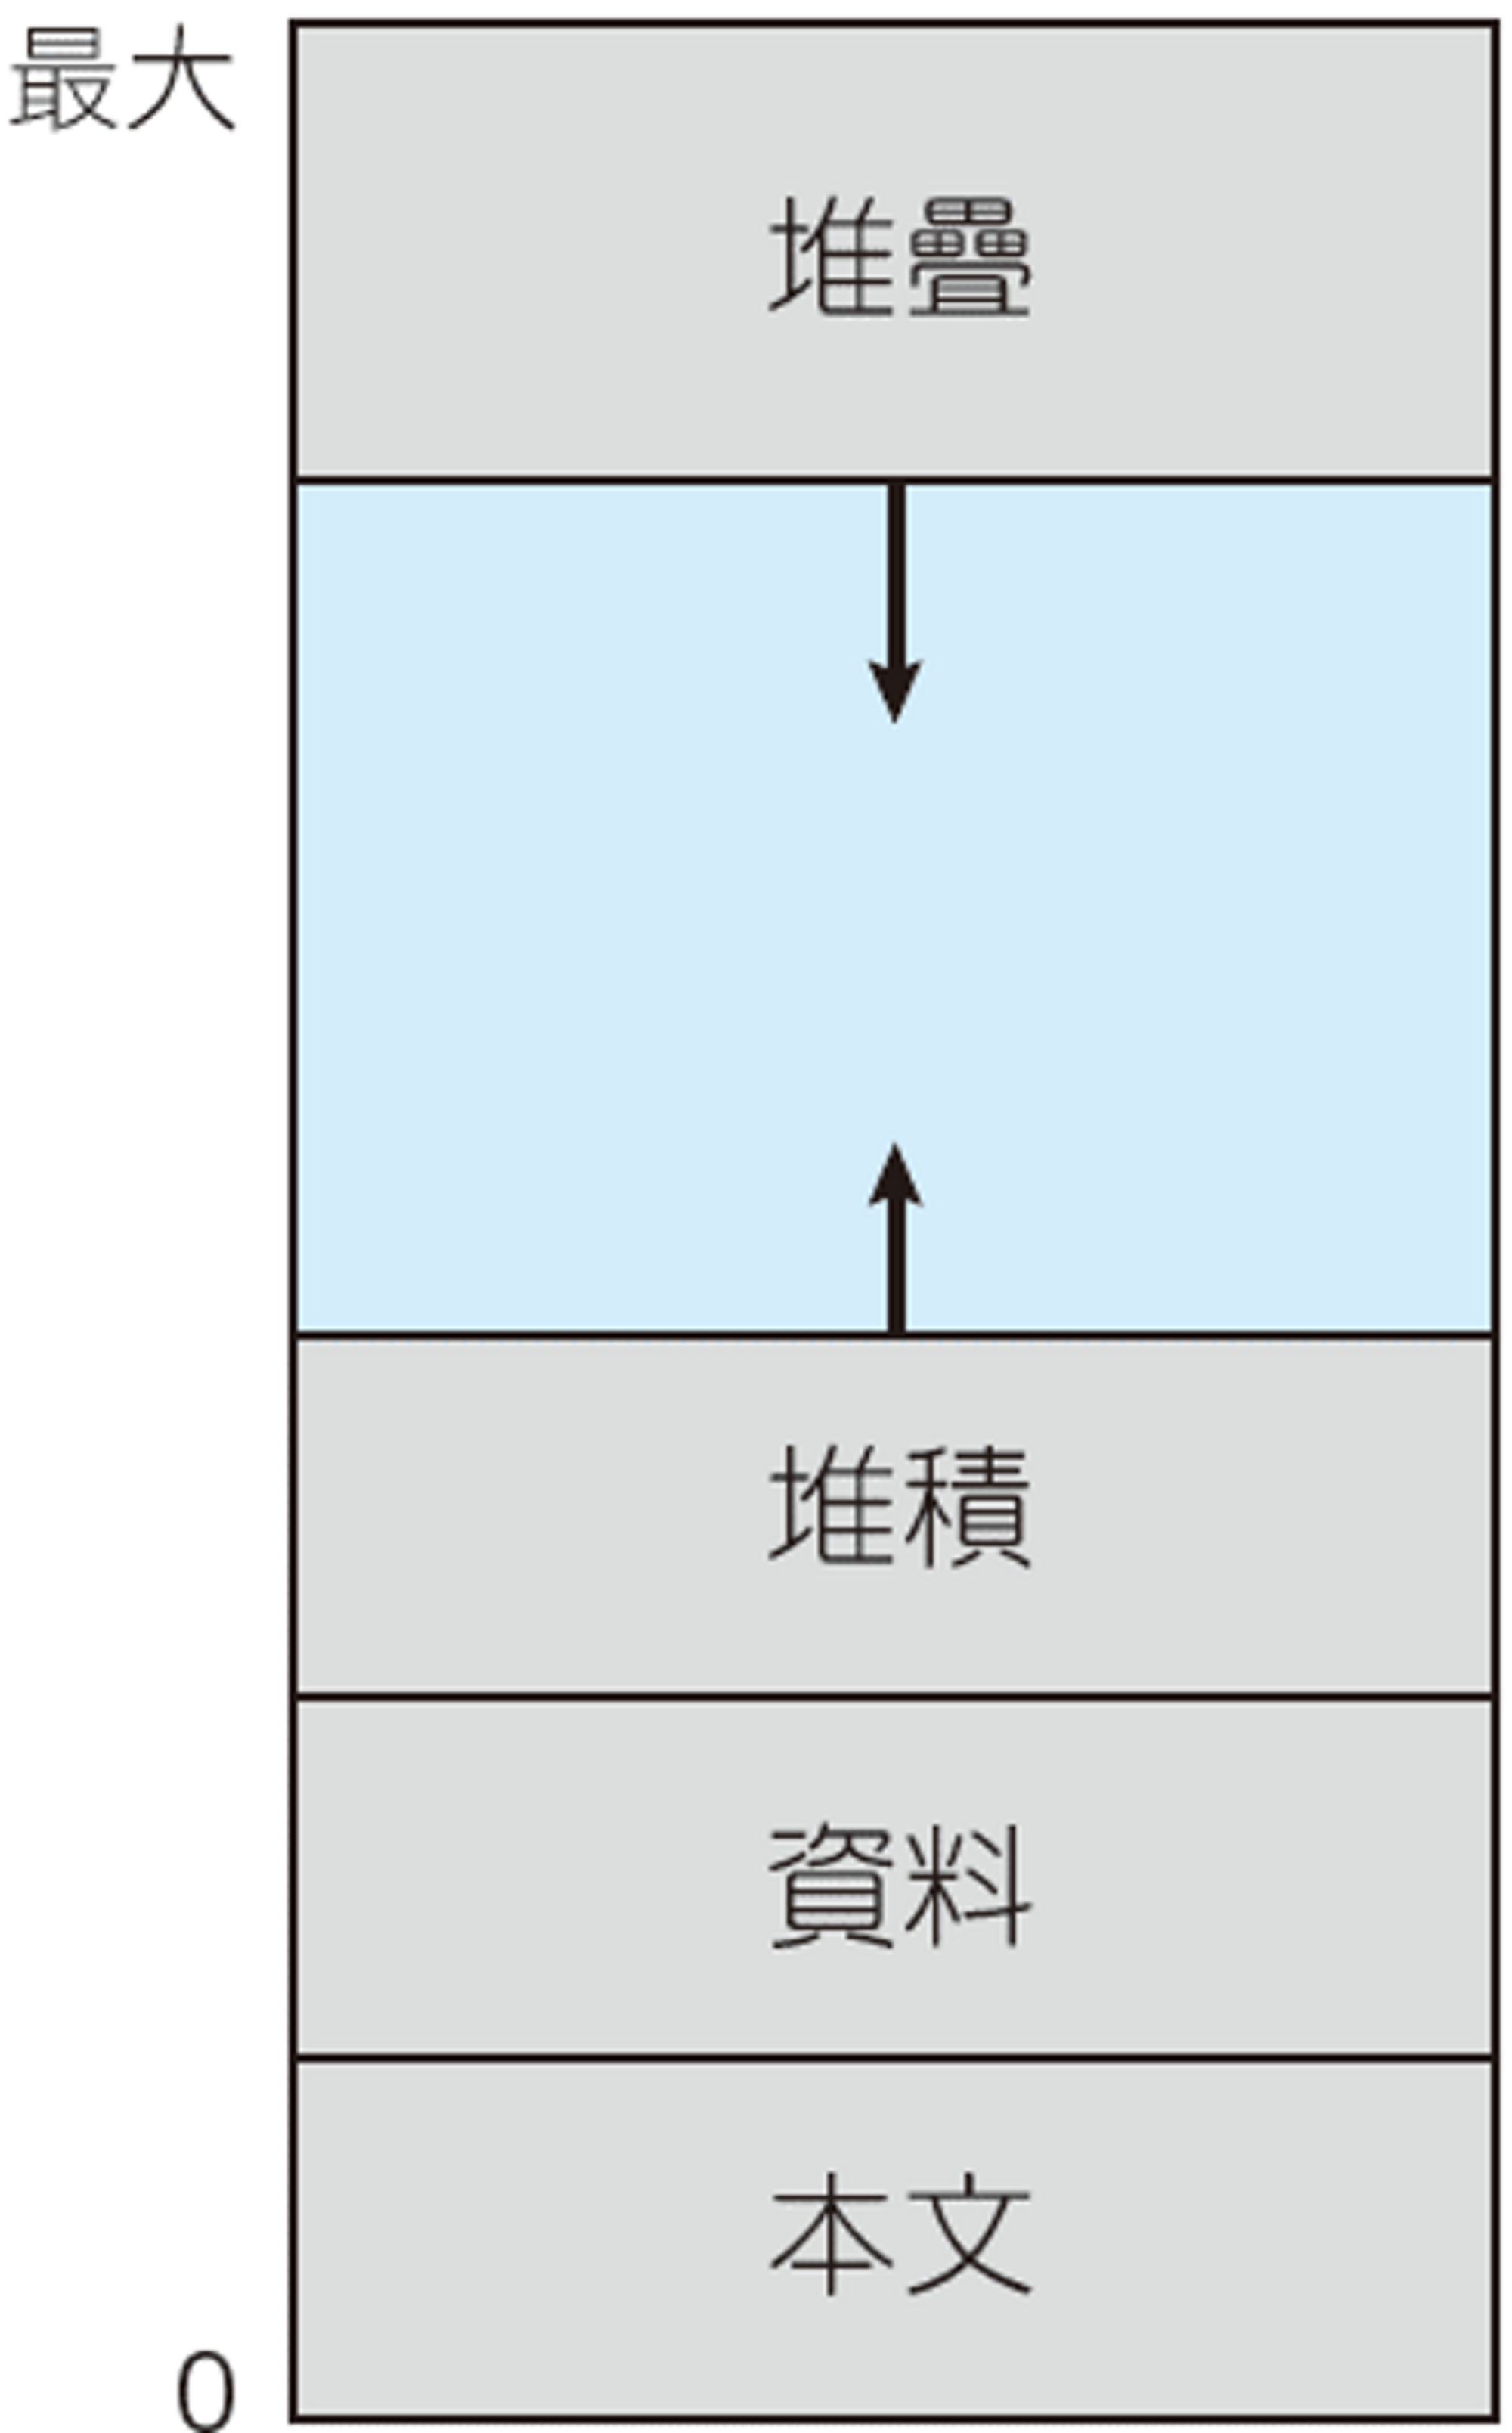
</div>


- Storage Class
    - auto
    - static auto
    - global (extern)
    - static global
    - register

auto variable

- scope: function / block
- extent: local

> declare in function / block



In [20]:
void f()  
{
    int i = 0;
    i++;
    cout << "i = " << i << endl;
}

In [21]:
int i;
for (i = 0; i < 3; i++) f();

i = 1
i = 1
i = 1


static auto variable

- scope: function / block
- extent: static

> compile 時即配置了 space，執行時會佔用同樣的位置。若有初值的設定，只會設定一次。

In [22]:
void f()
{
    static int i = 0;
    i++;
    cout << "i = " << i << endl;
}

In [23]:
int i;
for (i = 0; i < 3; i++) f();

i = 1
i = 2
i = 3


global variable (extern variable)

- scope: 
    1. 由定義開始處開始至檔案結束為「自然視野（natural scope）」。
    2. 任何不在自然視野內之 functions 可以藉由 `extern` 宣告來拓展視野。
       <br>如果 `extern` 於 function
        - 內：視野僅及於該 function 內。
        - 外：視野從宣告開始至檔案結束。
    3. files 之間亦可以用 extern 來拓展視野。
- extent: static

```cpp
// file1.cpp

int x;
main ()             // x ⤵
{
    extern int z;   // z ← 拓展 z 的視野
                    //     僅能在 {} 裡面作用
    ...
}       

int y;  
f1() {...}          // x, y ⤵


f2() {...}
int z;              // x, y, z ⤵ 

cout << x << y; 
```

```cpp
// file2.cpp

f3() {...}

extern z;           // z ⤵ 拓展 z 的視野，只能作用至檔案結束

f4() 
{
    extern int y;   // y ← 拓展 y 的視野
    cout << y;      //     僅能在 {} 裡面作用   
    ...
}

```